In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import glob
import random
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt

from PIL import Image

random.seed(98)
np.random.seed(98)

In [3]:
#breast_img = glob.glob('/content/drive/MyDrive/Visión de Máquina /Entrega/BancoImagenes/10272/**/*.png', recursive = True)
breast_img = glob.glob('/content/drive/MyDrive/BancoImagenes/BG02-12/**/*.png', recursive = True)
#breast_img1 = glob.glob('/content/drive/MyDrive/BancoImagenes/Color/**/*.png', recursive = True)


In [4]:
len(breast_img)

13088

In [5]:
for imgname in breast_img[:4]:
    print(imgname)

/content/drive/MyDrive/BancoImagenes/BG02-12/02/image64210.png
/content/drive/MyDrive/BancoImagenes/BG02-12/02/image64220.png
/content/drive/MyDrive/BancoImagenes/BG02-12/02/image64230.png
/content/drive/MyDrive/BancoImagenes/BG02-12/02/image64240.png


In [6]:
non_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_img.append(img)
    
    elif img[-5] == '1' :
        can_img.append(img)


In [7]:
non_num = len(non_img)
can_num = len(can_img)
        
total_img_num = non_num + can_num
        
print('Number of Images in IDC (-): {}' .format(non_num))
print('Number of Images in IDC (+) : {}' .format(can_num))
print('Total Number of Images : {}' .format(total_img_num))

Number of Images in IDC (-): 7421
Number of Images in IDC (+) : 5667
Total Number of Images : 13088


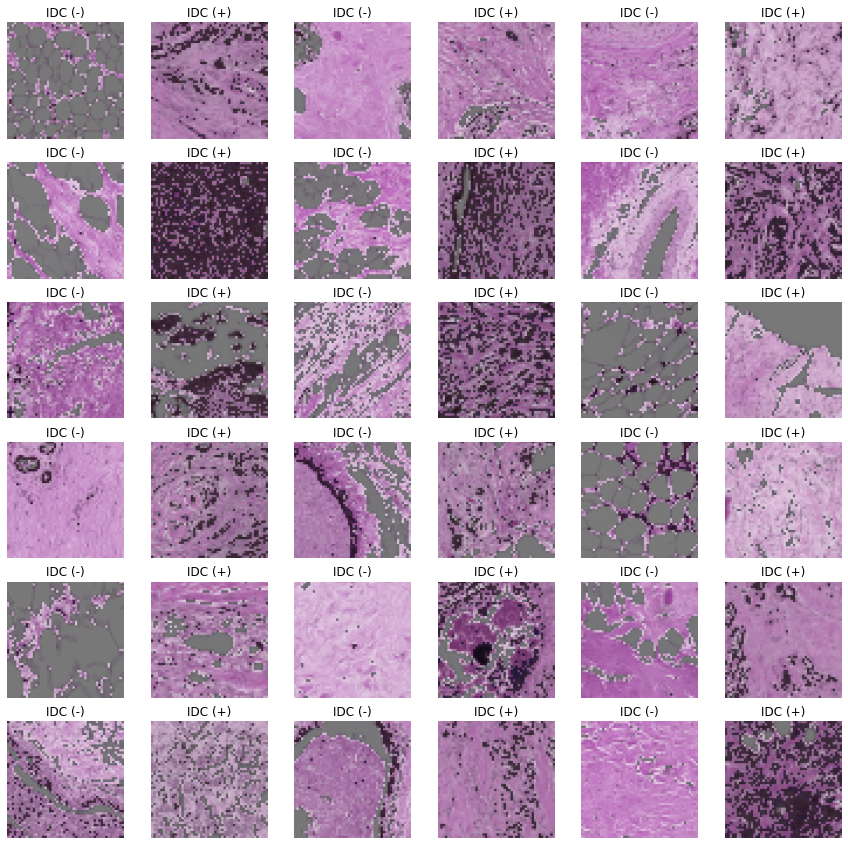

In [8]:
from keras.preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:
    
        img = image.load_img((non_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('IDC (-)')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    
        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

In [9]:
from matplotlib.image import imread
import cv2

some_non_img = random.sample(non_img, len(non_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in some_non_img:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in some_can_img:
    
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [47]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

print('X shape : {}' .format(X.shape))

X shape : (13088, 50, 50, 3)


In [48]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_predict, y_train, y_true = train_test_split(X, y, test_size = 0.2, random_state = 7)

rate = 0.5
num = int(X.shape[0] * rate)

X_test = X_train[num:]
X_train = X_train[:num]

y_test = y_train[num:]
y_train = y_train[:num]

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_true = to_categorical(y_true, 2)

print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('X_predict shape : {}' .format(X_predict.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))
print('y_true shape : {}' .format(y_true.shape))

X_train shape : (6544, 50, 50, 3)
X_test shape : (3926, 50, 50, 3)
X_predict shape : (2618, 50, 50, 3)
y_train shape : (6544, 2)
y_test shape : (3926, 2)
y_true shape : (2618, 2)


In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(2, activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 25, 25, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 12, 12, 64)       

In [50]:
!pip install Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from tensorflow.keras.optimizers import Adam

Adam = Adam(learning_rate = 0.0001)
model.compile(loss = 'binary_crossentropy', optimizer = Adam, metrics = ['accuracy'])

In [52]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 50)

Epoch 1/50
131/131 [==============================] - 62s 468ms/step - loss: 3.8741 - accuracy: 0.8585 - val_loss: 0.3982 - val_accuracy: 0.8907
Epoch 2/50
131/131 [==============================] - 51s 390ms/step - loss: 0.6104 - accuracy: 0.8695 - val_loss: 0.5238 - val_accuracy: 0.8907
Epoch 3/50
131/131 [==============================] - 50s 381ms/step - loss: 0.4431 - accuracy: 0.8816 - val_loss: 0.5323 - val_accuracy: 0.8907
Epoch 4/50
131/131 [==============================] - 49s 373ms/step - loss: 0.4089 - accuracy: 0.8871 - val_loss: 0.5542 - val_accuracy: 0.8907
Epoch 5/50
131/131 [==============================] - 49s 372ms/step - loss: 0.3859 - accuracy: 0.8901 - val_loss: 0.5334 - val_accuracy: 0.8907
Epoch 6/50
131/131 [==============================] - 49s 373ms/step - loss: 0.3811 - accuracy: 0.8910 - val_loss: 0.5513 - val_accuracy: 0.8907
Epoch 7/50
131/131 [==============================] - 51s 388ms/step - loss: 0.3711 - accuracy: 0.8918 - val_loss: 0.5545 - val_ac

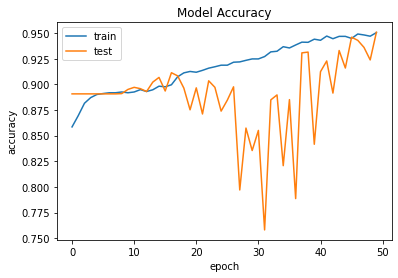

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
result = model.evaluate(X_test, y_test, batch_size = 50)
print('Test Loss, Test Accuracy :', result)

79/79 [==============================] - 9s 115ms/step - loss: 0.1598 - accuracy: 0.9508
Test Loss, Test Accuracy : [0.15983577072620392, 0.9508405327796936]


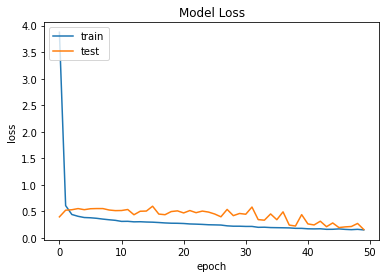

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
P = model.predict(X_predict)

true = 0
for i in range(X_predict.shape[0]):
    if(np.argmax(P[i]) == np.argmax(y_true[i])):
        true = true + 1

pre_accuracy = 100 * float(true/X_predict.shape[0])        
print('Predict Accuracy: {}' .format(pre_accuracy))

Predict Accuracy: 94.9579831932773


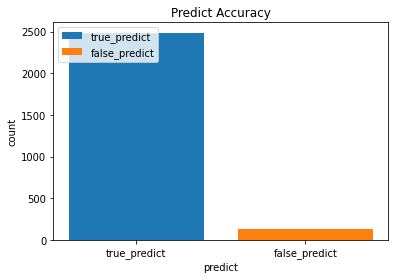

In [57]:
import seaborn as sns
false = len(X_predict) - true

predict = [true, false]
label = ['true_predict', 'false_predict']

plt.bar(label[0], predict[0])
plt.bar(label[1], predict[1])
plt.title('Predict Accuracy')
plt.xlabel('predict')
plt.ylabel('count')
plt.legend(['true_predict', 'false_predict'], loc='upper left')
plt.show()